In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import pickle
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,accuracy_score
%matplotlib inline

In [14]:
# Forming the iris dataframe
Data = pd.read_csv("iris.csv")
print("Dataset loaded successfully")

Dataset loaded successfully


In [15]:
#Top values of dataset
Data.head()

,PetalLength,SepalWidth,SepalLength,PetalWidth,Species
0,1.4,3.5,5.1,0.2,Iris-setosa
1,1.4,3.0,4.9,0.2,Iris-setosa
2,1.3,3.2,4.7,0.2,Iris-setosa
3,1.5,3.1,4.6,0.2,Iris-setosa
4,1.4,3.6,5.0,0.2,Iris-setosa


In [16]:
#Bottom values of dataset
Data.tail()

,PetalLength,SepalWidth,SepalLength,PetalWidth,Species
145,5.2,3.0,6.7,2.3,Iris-virginica
146,5.0,2.5,6.3,1.9,Iris-virginica
147,5.2,3.0,6.5,2.0,Iris-virginica
148,5.4,3.4,6.2,2.3,Iris-virginica
149,5.1,3.0,5.9,1.8,Iris-virginica


In [17]:
Data.shape

(150, 5)

In [18]:
Data.columns

Index([' PetalLength', ' SepalWidth', 'SepalLength', ' PetalWidth', 'Species'], dtype='object')

In [19]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0    PetalLength  150 non-null    float64
 1    SepalWidth   150 non-null    float64
 2   SepalLength   150 non-null    float64
 3    PetalWidth   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [20]:
Data.describe()

,PetalLength,SepalWidth,SepalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,3.758667,3.054000,5.843333,1.198667
std,1.764420,0.433594,0.828066,0.763161
min,1.000000,2.000000,4.300000,0.100000
25%,1.600000,2.800000,5.100000,0.300000
50%,4.350000,3.000000,5.800000,1.300000
75%,5.100000,3.300000,6.400000,1.800000
max,6.900000,4.400000,7.900000,2.500000


In [21]:
#incase you want to drop any column from it 
# Data.drop('Id', axis = 1 , inplace= True)
Data.head()

,PetalLength,SepalWidth,SepalLength,PetalWidth,Species
0,1.4,3.5,5.1,0.2,Iris-setosa
1,1.4,3.0,4.9,0.2,Iris-setosa
2,1.3,3.2,4.7,0.2,Iris-setosa
3,1.5,3.1,4.6,0.2,Iris-setosa
4,1.4,3.6,5.0,0.2,Iris-setosa


In [22]:
X = Data.drop('Species', axis = 1)
Y = Data['Species']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=100)

In [26]:
dtc = DecisionTreeClassifier(criterion = "entropy",random_state =0)
model = dtc.fit(X_train,y_train)
y_predict = dtc.predict(X_test)

In [27]:
#Saving Model
pickle.dump(dtc, open('model.pkl','wb'))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.83      0.91         6
 Iris-virginica       0.93      1.00      0.96        13

       accuracy                           0.97        30
      macro avg       0.98      0.94      0.96        30
   weighted avg       0.97      0.97      0.97        30



<AxesSubplot: >

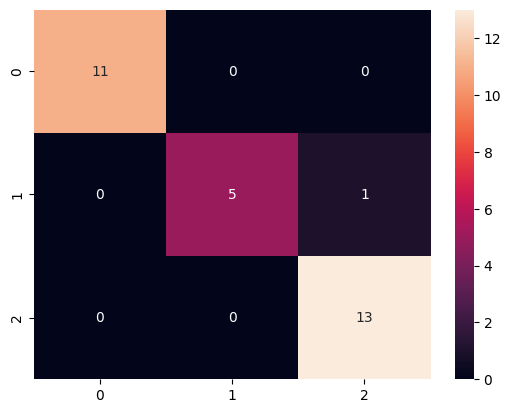

In [28]:
print(classification_report(y_test, y_predict))
sns.heatmap(confusion_matrix(y_test, y_predict),annot = True)

In [29]:
accuracy_score(y_test, y_predict)

0.9666666666666667

In [30]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_test, y_predict)

0.9488580359780636

In [31]:
dtc1 = DecisionTreeClassifier(criterion = "gini",random_state =0)
model = dtc1.fit(X_train,y_train)
y_predict1 = dtc1.predict(X_test)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.83      0.91         6
 Iris-virginica       0.93      1.00      0.96        13

       accuracy                           0.97        30
      macro avg       0.98      0.94      0.96        30
   weighted avg       0.97      0.97      0.97        30



<AxesSubplot: >

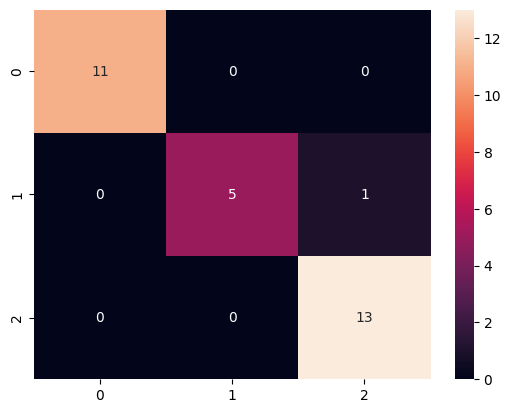

In [32]:
print(classification_report(y_test, y_predict1))
sns.heatmap(confusion_matrix(y_test, y_predict1),annot = True)

In [33]:
accuracy_score(y_test, y_predict1)

0.9666666666666667

In [34]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_test, y_predict1)

0.9488580359780636

[Text(0.4, 0.9166666666666666, 'x[3] <= 0.8\nentropy = 1.581\nsamples = 120\nvalue = [39, 44, 37]'),
 Text(0.3, 0.75, 'entropy = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(0.5, 0.75, 'x[3] <= 1.65\nentropy = 0.995\nsamples = 81\nvalue = [0, 44, 37]'),
 Text(0.2, 0.5833333333333334, 'x[0] <= 4.95\nentropy = 0.42\nsamples = 47\nvalue = [0, 43, 4]'),
 Text(0.1, 0.4166666666666667, 'entropy = 0.0\nsamples = 42\nvalue = [0, 42, 0]'),
 Text(0.3, 0.4166666666666667, 'x[2] <= 6.05\nentropy = 0.722\nsamples = 5\nvalue = [0, 1, 4]'),
 Text(0.2, 0.25, 'x[3] <= 1.55\nentropy = 1.0\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.1, 0.08333333333333333, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.3, 0.08333333333333333, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.4, 0.25, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.5833333333333334, 'x[0] <= 4.85\nentropy = 0.191\nsamples = 34\nvalue = [0, 1, 33]'),
 Text(0.7, 0.4166666666666667, 'x[1] <= 3.1\nentropy = 

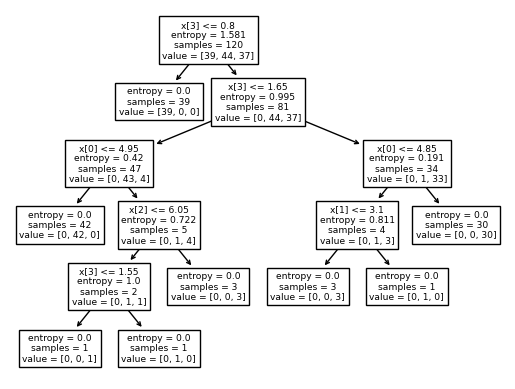

In [35]:
from sklearn import tree
tree.plot_tree(dtc)

[Text(0.4, 0.9166666666666666, 'x[3] <= 0.8\ngini = 0.665\nsamples = 120\nvalue = [39, 44, 37]'),
 Text(0.3, 0.75, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(0.5, 0.75, 'x[3] <= 1.65\ngini = 0.496\nsamples = 81\nvalue = [0, 44, 37]'),
 Text(0.2, 0.5833333333333334, 'x[0] <= 4.95\ngini = 0.156\nsamples = 47\nvalue = [0, 43, 4]'),
 Text(0.1, 0.4166666666666667, 'gini = 0.0\nsamples = 42\nvalue = [0, 42, 0]'),
 Text(0.3, 0.4166666666666667, 'x[2] <= 6.05\ngini = 0.32\nsamples = 5\nvalue = [0, 1, 4]'),
 Text(0.2, 0.25, 'x[3] <= 1.55\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.1, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.3, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.4, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.5833333333333334, 'x[0] <= 4.85\ngini = 0.057\nsamples = 34\nvalue = [0, 1, 33]'),
 Text(0.7, 0.4166666666666667, 'x[1] <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3

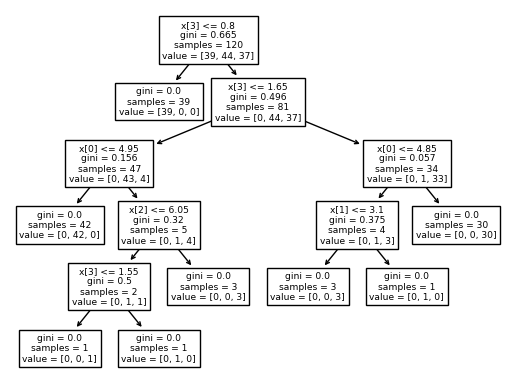

In [36]:
from sklearn import tree
tree.plot_tree(dtc1)